Model loaded successfully!

Image: CornCommonRust1.JPG
Predicted class: Corn_(maize)___Common_rust_
Accuracy of this prediction: 100.00%
Suggested Treatment: Use resistant hybrids. Apply azoxystrobin or propiconazole-based fungicides if rust spreads rapidly. Avoid overhead irrigation.


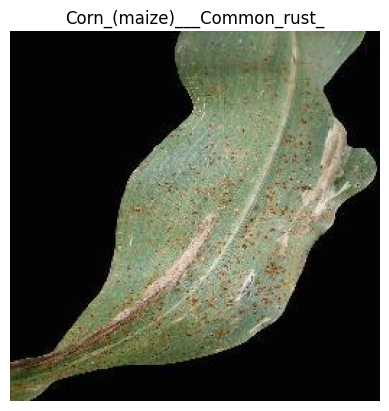

In [4]:
# TEST MODEL
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

IMG_SIZE = (128, 128)
MODEL_PATH = r"C:\ml-project\crop_disease_model.keras"         
TREATMENT_FILE = r"C:\ml-project\disease_treatments.txt"        

model = tf.keras.models.load_model(MODEL_PATH, compile=False)
print("Model loaded successfully!")

def load_treatments(file_path):
    treatments = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            if ":" in line:
                key, value = line.strip().split(":", 1)
                treatments[key.strip()] = value.strip()
    return treatments

disease_treatments = load_treatments(TREATMENT_FILE)

CLASS_NAMES_FILE = r"C:\ml-project\class_names.npy"
if os.path.exists(CLASS_NAMES_FILE):
    class_names = np.load(CLASS_NAMES_FILE, allow_pickle=True)
else:
    raise FileNotFoundError("class_names.npy not found. Please recreate from training dataset.")

def convert_image_to_array(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(IMG_SIZE)
    img_array = np.array(img, dtype=np.float32)
    return img_array

def predict_image(img_path):
    im = convert_image_to_array(img_path)
    np_image_li = np.array(im, dtype=np.float32) / 255.0
    npp_image = np.expand_dims(np_image_li, axis=0)

    result = model.predict(npp_image, verbose=0)

    prob = np.max(result) 
    predicted_class = class_names[np.argmax(result)]
    accuracy_percent = prob * 100 

    treatment = disease_treatments.get(predicted_class, "No treatment information available.")

    print("\nImage:", os.path.basename(img_path))
    print("Predicted class:", predicted_class)
    print(f"Accuracy of this prediction: {accuracy_percent:.2f}%")
    print("Suggested Treatment:", treatment)

    image = Image.open(img_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{predicted_class}")
    plt.show()


# ENTER PATH FOR DETECTION

if __name__ == "__main__":
    test_image = r"C:\ml-project\test\test\CornCommonRust1.JPG"
    predict_image(test_image)
